In [1]:
%cd Mask_RCNN/

/Users/evinpinar/Documents/Classes/Seminar/Mask_RCNN


In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "Mask_RCNN/samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "Mask_RCNN/logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "2011_09_26/2011_09_26_drive_0005_sync/image_02/data/")

Using TensorFlow backend.


In [35]:
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "melbourne_dataset/")

In [36]:
COCO_MODEL_PATH

'/Users/evinpinar/Documents/Classes/Seminar/mask_rcnn_coco.h5'

In [37]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [7]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [8]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [38]:
IMAGE_DIR

'/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/'

In [39]:
import fnmatch
def _recursive_glob(treeroot, pattern):
    results = []
    for base, _, files in os.walk(treeroot):
        files = fnmatch.filter(files, pattern)
        results.extend(os.path.join(base, f) for f in files)
    return results

In [40]:
im_files = sorted(_recursive_glob(IMAGE_DIR, '*.' + 'png'))
basepath_in = os.path.normpath(IMAGE_DIR)
image = skimage.io.imread(im_files[0])

In [41]:
(len(im_files)-1)

188

In [15]:
for i in range(0,9,3):
    print(i, i+1, i+2)

0 1 2
3 4 5
6 7 8


In [42]:
image = skimage.io.imread(im_files[0])

(360, 640, 3)


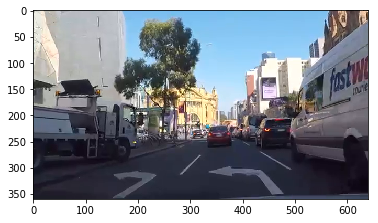

In [43]:
print(image.shape)
plt.imshow(image)

Processing 1 images
image                    shape: (360, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


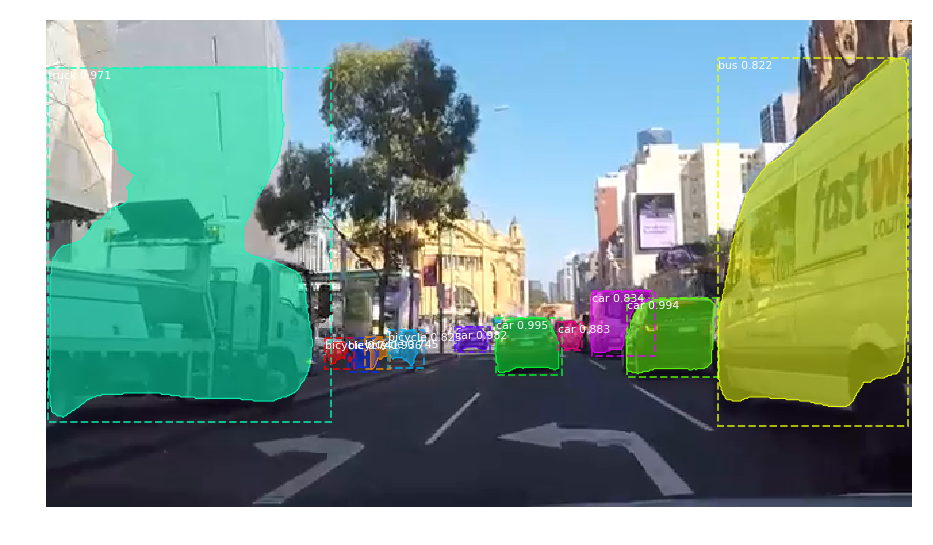

In [44]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [45]:
r['masks'].shape, r['class_ids'].shape

((360, 640, 11), (11,))

In [21]:
for i in range(r['class_ids'].size):        
        if r['class_ids'][i] in [1, 2, 3, 4, 6, 8]:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0

In [22]:
raw = im_files[0].split('/')[-1]
raw_name = raw.split('.')

In [23]:
save_folder = "/Users/evinpinar/Documents/Classes/Seminar/det_files"

In [24]:
a = visualize.save_image(image, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3) 

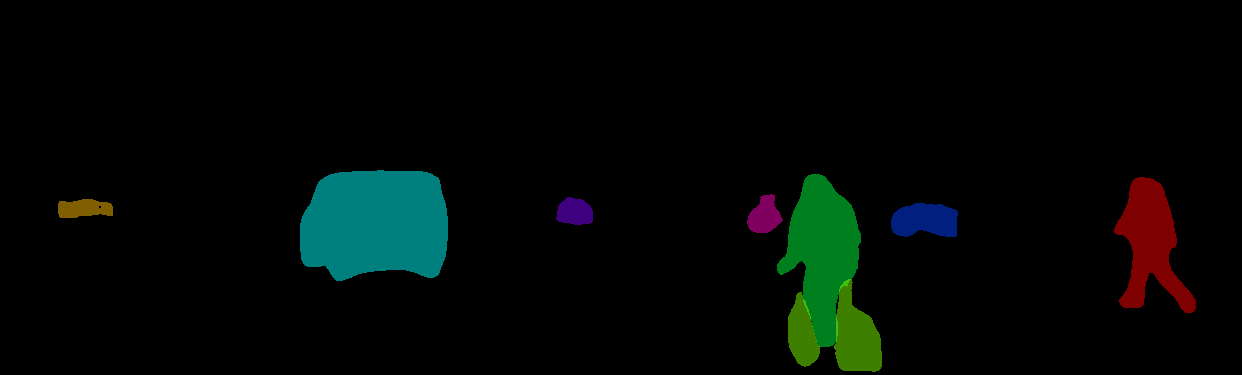

In [25]:
a

In [27]:
import cv2
black = cv2.imread(save_folder+"/"+raw_name[0]+'.jpg')
black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)

True

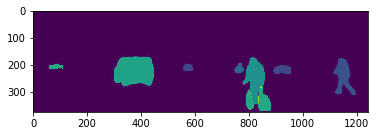

In [28]:
plt.imshow(black)

In [ ]:
black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)

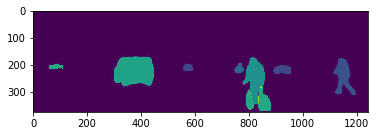

In [30]:
plt.imshow(black)

In [46]:
im_files[:5]

['/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out1.png',
 '/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out10.png',
 '/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out100.png',
 '/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out101.png',
 '/Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out102.png']

In [47]:
raw = im_files[0].split('/')[-1]
raw_name = raw.split('.')

In [49]:
raw, raw_name

('out1.png', ['out1', 'png'])

In [50]:
label_results = []
for j in range(len(im_files)):
    image = skimage.io.imread(im_files[j])
    results = model.detect([image], verbose=0)
    r = results[0]
    for i in range(r['class_ids'].size):
        if r['class_ids'][i] in [1, 2, 3, 4, 6, 8]:
            continue
        else :
            r['class_ids'][i] = 0
            r['rois'][i] = 0
            r['masks'][i] = 0
            r['scores'][i] = 0
            
    raw = im_files[j].split('/')[-1]
    raw_name = raw.split('.')
    print("raw = ", raw)
    
    a = visualize.save_image(image, raw_name[0], r['rois'], r['masks'], r['class_ids'], r['scores'], class_names, save_dir=save_folder, mode=3)
    
    if a == None :
        black = np.zeros(image.shape).astype(np.uint8)
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        print("he")
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    else:
        print("aa = ", raw)
        black = cv2.imread(save_folder+'/'+raw_name[0]+'.jpg')
        black = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(save_folder, raw_name[0]+'.png'), black)
    
    label_results.append(black)

raw =  out1.png
aa =  out1.png
raw =  out10.png
aa =  out10.png
raw =  out100.png
aa =  out100.png
raw =  out101.png
aa =  out101.png
raw =  out102.png
aa =  out102.png
raw =  out103.png
aa =  out103.png
raw =  out104.png
aa =  out104.png
raw =  out105.png
aa =  out105.png
raw =  out106.png
aa =  out106.png
raw =  out107.png
aa =  out107.png
raw =  out108.png
aa =  out108.png
raw =  out109.png
aa =  out109.png
raw =  out11.png
aa =  out11.png
raw =  out110.png
aa =  out110.png
raw =  out111.png
aa =  out111.png
raw =  out112.png
aa =  out112.png
raw =  out113.png
aa =  out113.png
raw =  out114.png
aa =  out114.png
raw =  out115.png
aa =  out115.png
raw =  out116.png
aa =  out116.png
raw =  out117.png
aa =  out117.png
raw =  out118.png
aa =  out118.png
raw =  out119.png
aa =  out119.png
raw =  out12.png
aa =  out12.png
raw =  out120.png
aa =  out120.png
raw =  out121.png
aa =  out121.png
raw =  out122.png
aa =  out122.png
raw =  out123.png
aa =  out123.png
raw =  out124.png
aa =  out124

In [66]:
label_results[0].shape

(375, 1242)

In [64]:
len(label_results), len(im_files)

(153, 153)

In [51]:
import numpy as np

def compute_overlap(mask1, mask2):
    # Use IoU here.
    return np.sum(mask1 & mask2)/np.sum(mask1 | mask2)

def align(seg_img1, seg_img2, seg_img3, threshold_same=0.3):
    res_img1 = np.zeros_like(seg_img1)
    res_img2 = np.zeros_like(seg_img2)
    res_img3 = np.zeros_like(seg_img3)
    remaining_objects2 = list(np.unique(seg_img2.flatten()))
    remaining_objects3 = list(np.unique(seg_img3.flatten()))
    for seg_id in np.unique(seg_img1):
        # See if we can find correspondences to seg_id in seg_img2.
        max_overlap2 = float('-inf')
        max_segid2 = -1
        for seg_id2 in remaining_objects2:
            overlap = compute_overlap(seg_img1==seg_id, seg_img2==seg_id2)
            if overlap>max_overlap2:
                max_overlap2 = overlap
                max_segid2 = seg_id2
        if max_overlap2 > threshold_same:
            max_overlap3 = float('-inf')
            max_segid3 = -1
            for seg_id3 in remaining_objects3:
                overlap = compute_overlap(seg_img2==max_segid2, seg_img3==seg_id3)
                if overlap>max_overlap3:
                    max_overlap3 = overlap
                    max_segid3 = seg_id3
            if max_overlap3 > threshold_same:
                res_img1[seg_img1==seg_id] = seg_id
                res_img2[seg_img2==max_segid2] = seg_id
                res_img3[seg_img3==max_segid3] = seg_id
                remaining_objects2.remove(max_segid2)
                remaining_objects3.remove(max_segid3)
    return res_img1, res_img2, res_img3

In [52]:
file_extension = 'png'
for i in range(0,len(label_results),3):
    seg1, seg2, seg3 = label_results[i], label_results[i+1], label_results[i+2]
    res_img1, res_img2, res_img3 = align(seg1, seg2, seg3, threshold_same=0.5)
    
    im_seg_path1 = im_files[i].replace('.%s' % file_extension,
                                              '-seg.%s' % file_extension)
    skimage.io.imsave(im_seg_path1, res_img1)
    
    im_seg_path2 = im_files[i+1].replace('.%s' % file_extension,
                                              '-seg.%s' % file_extension)
    skimage.io.imsave(im_seg_path2, res_img2)
    
    im_seg_path3 = im_files[i+2].replace('.%s' % file_extension,
                                              '-seg.%s' % file_extension)
    skimage.io.imsave(im_seg_path3, res_img3)

/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out1-seg.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out10-seg.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out100-seg.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/evinpinar/Documents/Classes/Seminar/melbourne_dataset/out11-seg.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: /Users/evinpinar/Documents/Classes/Seminar/melbou

In [68]:
# Compare outputs

out_nomask = '/Users/evinpinar/Documents/Classes/Seminar/melbourne_output_nomask/'
out_withmask = '/Users/evinpinar/Documents/Classes/Seminar/melbourne_output/'

In [69]:
im_files_nomask = sorted(_recursive_glob(out_nomask, '*.' + 'png'))
im_files_withmask = sorted(_recursive_glob(out_withmask, '*.' + 'png'))

In [75]:
diff = []
for i in range(len(im_files_nomask)):
    dep = skimage.io.imread(im_files_nomask[i])[128:]
    dep_mask = skimage.io.imread(im_files_withmask[i])[128:]
    diff.append(np.sum(abs(dep-dep_mask)))

In [70]:
image = skimage.io.imread(im_files_nomask[0])
image2 = skimage.io.imread(im_files_withmask[0])

In [71]:
image.shape

(256, 416, 3)

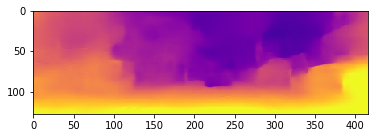

In [72]:
plt.imshow(image[128:])

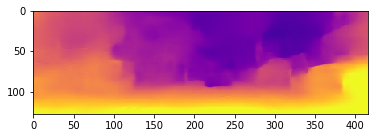

In [73]:
plt.imshow(image2[128:])

In [74]:
np.sum(image[128:] - image2[128:])

0